<a href="https://colab.research.google.com/github/KILjungjoon/text-mining/blob/main/%EC%98%81%EC%96%B4%ED%85%8D%EC%8A%A4%ED%8A%B8_%EA%B8%B0%EB%B3%B8%EB%B6%84%EC%84%9D_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
f = open('/content/The Displacement of Conflicts.txt', 'r', encoding='utf-8-sig')
text=f.read().strip()
# print(text.count(" ")+1)
text

'WHAT happens in politics depends on the way in which people are divided into factions, parties, groups, classes, etc. The outcome of the game of politics depends on which of a multitude of possible conflicts gains the dominant position. The proposition may be illustrated by a simple diagram:\n\n\nIn this figure, the circle represents the political universe and the lines AB and CD are two possible lines of cleavage, among an infinite number of possibilities. The cleavages shown in the figure are completely inconsistent with each other; that is, a shift from one to the other involves a total reorganization of political alignments. Not only is the composition of each side changed as a result of the shift, but the conflict in the CD alignment is necessarily about something different from the conflict in the AB alignment, and the outcome of the conflict is therefore different. The political universe remains the same in spite of the shift, but what people can do and what they cannot do depe

In [3]:
# TextBlob Lemmatizer with appropriate POS tag
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
# basic preprocessing
import re
re01 = re.sub(r'\n{2,}', ' ', text)           # 2칸 이상 공백 1칸으로 변경
re02=re.sub("[^0-9a-zA-Z]", " ", re01)        # 영어와 숫자 제외한 문자, 기호 제거
print("어절: 총",re01.count(" ")+1,"개")                      # 어절 수 계산
re02

어절: 총 4214 개


'WHAT happens in politics depends on the way in which people are divided into factions  parties  groups  classes  etc  The outcome of the game of politics depends on which of a multitude of possible conflicts gains the dominant position  The proposition may be illustrated by a simple diagram  In this figure  the circle represents the political universe and the lines AB and CD are two possible lines of cleavage  among an infinite number of possibilities  The cleavages shown in the figure are completely inconsistent with each other  that is  a shift from one to the other involves a total reorganization of political alignments  Not only is the composition of each side changed as a result of the shift  but the conflict in the CD alignment is necessarily about something different from the conflict in the AB alignment  and the outcome of the conflict is therefore different  The political universe remains the same in spite of the shift  but what people can do and what they cannot do depends o

In [48]:
# tokenizing
tokens=text.split(' ')
print(len(tokens))

4130


In [12]:
## Lemmatization
# Define function to lemmatize each word with its POS tag
from textblob import TextBlob, Word
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Define lemmatization function
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return lemmatized_list

str=' '.join(tokens)
str_low=str.lower()
lemmatokens=lemmatize_with_postag(str_low)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [17]:
## token 비교
# 일반 tokens
print(tokens)
# 표제어화된 tokens
print(lemmatokens)
print("표제어 토큰 수: 총", len(lemmatokens),"개")

['WHAT', 'happens', 'in', 'politics', 'depends', 'on', 'the', 'way', 'in', 'which', 'people', 'are', 'divided', 'into', 'factions,', 'parties,', 'groups,', 'classes,', 'etc.', 'The', 'outcome', 'of', 'the', 'game', 'of', 'politics', 'depends', 'on', 'which', 'of', 'a', 'multitude', 'of', 'possible', 'conflicts', 'gains', 'the', 'dominant', 'position.', 'The', 'proposition', 'may', 'be', 'illustrated', 'by', 'a', 'simple', 'diagram:\n\n\nIn', 'this', 'figure,', 'the', 'circle', 'represents', 'the', 'political', 'universe', 'and', 'the', 'lines', 'AB', 'and', 'CD', 'are', 'two', 'possible', 'lines', 'of', 'cleavage,', 'among', 'an', 'infinite', 'number', 'of', 'possibilities.', 'The', 'cleavages', 'shown', 'in', 'the', 'figure', 'are', 'completely', 'inconsistent', 'with', 'each', 'other;', 'that', 'is,', 'a', 'shift', 'from', 'one', 'to', 'the', 'other', 'involves', 'a', 'total', 'reorganization', 'of', 'political', 'alignments.', 'Not', 'only', 'is', 'the', 'composition', 'of', 'each',

lemmatokens 리스트 요소 중에 'depends', 'on'의 경우 'depend'로 바꾼다.

In [16]:
# 수정한 tokens
lemmatokens_modified = [w if not(w == 'depends' and n == 'on') else 'depend' for w, n in zip(lemmatokens, lemmatokens[1:])]
print(lemmatokens_modified)

['what', 'happen', 'in', 'politics', 'depend', 'on', 'the', 'way', 'in', 'which', 'people', 'be', 'divide', 'into', 'faction', 'party', 'group', 'class', 'etc', 'the', 'outcome', 'of', 'the', 'game', 'of', 'politics', 'depend', 'on', 'which', 'of', 'a', 'multitude', 'of', 'possible', 'conflict', 'gain', 'the', 'dominant', 'position', 'the', 'proposition', 'may', 'be', 'illustrate', 'by', 'a', 'simple', 'diagram', 'in', 'this', 'figure', 'the', 'circle', 'represent', 'the', 'political', 'universe', 'and', 'the', 'line', 'ab', 'and', 'cd', 'be', 'two', 'possible', 'line', 'of', 'cleavage', 'among', 'an', 'infinite', 'number', 'of', 'possibility', 'the', 'cleavage', 'show', 'in', 'the', 'figure', 'be', 'completely', 'inconsistent', 'with', 'each', 'other', 'that', 'be', 'a', 'shift', 'from', 'one', 'to', 'the', 'other', 'involve', 'a', 'total', 'reorganization', 'of', 'political', 'alignment', 'not', 'only', 'be', 'the', 'composition', 'of', 'each', 'side', 'change', 'a', 'a', 'result', '

* Show High Frequent Words & N-grams

[Text(0.5, 1.0, 'frequent trigrams')]

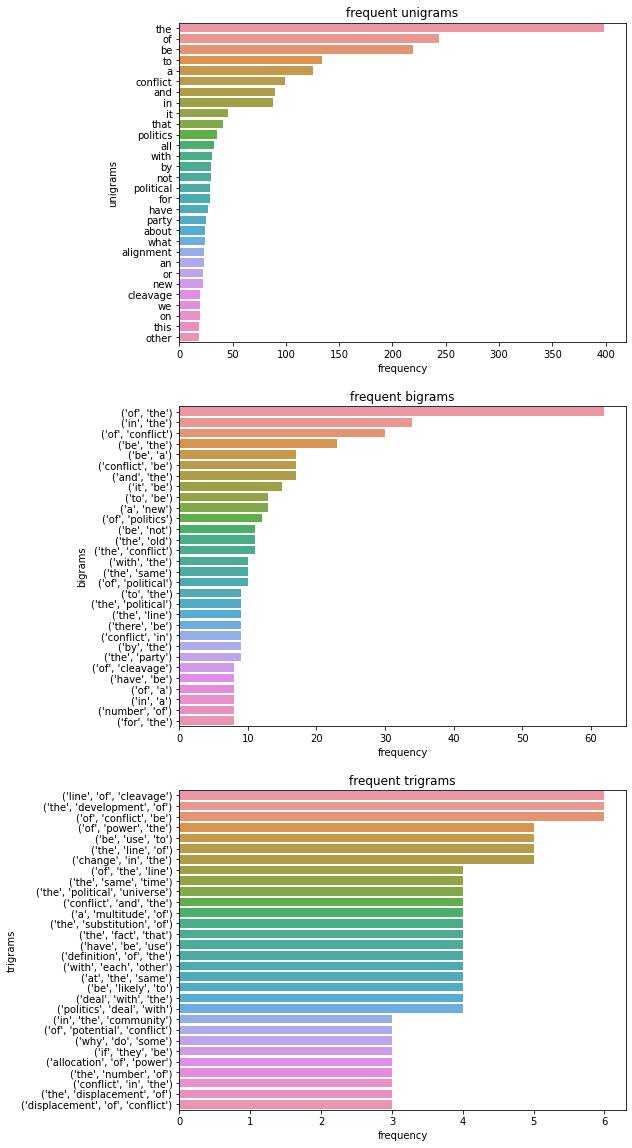

In [21]:
from collections import Counter
from nltk import ngrams
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # 다시 스트링으로 결합
# Text=' '.join(lemmatokens_modified)

#counts the words, bigrams and trigrams
counted = Counter(lemmatokens_modified)
counted_2= Counter(ngrams(lemmatokens_modified,2))
counted_3= Counter(ngrams(lemmatokens_modified,3))

#creates 3 data frames and returns thems
unigrams = pd.DataFrame(counted.items(),columns=['unigrams','frequency']).sort_values(by='frequency',ascending=False)
bigrams =pd.DataFrame(counted_2.items(),columns=['bigrams','frequency']).sort_values(by='frequency',ascending=False)
trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency' ,ascending=False)

# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='unigrams',data=unigrams.head(30)).set(title='frequent unigrams')
sns.barplot(ax=axes[1],x='frequency',y='bigrams',data=bigrams.head(30)).set(title='frequent bigrams')
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams.head(30)).set(title='frequent trigrams')

---
---
* stopwords 제거는 분석 목적에 따라 이용

In [44]:
# stopwords 제거
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

tokens_stopwords = []
for word in lemmatokens_modified: 
    if word not in stop_words: 
        tokens_stopwords.append(word) 

print('불용어 제거 전 :',len(lemmatokens_modified))
print('불용어 제거 후 :',len(tokens_stopwords))

불용어 제거 전 : 4153
불용어 제거 후 : 2047


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


---
---
* 불용어 제거한 토큰으로 다시 n-gram 실행

[Text(0.5, 1.0, 'frequent trigrams')]

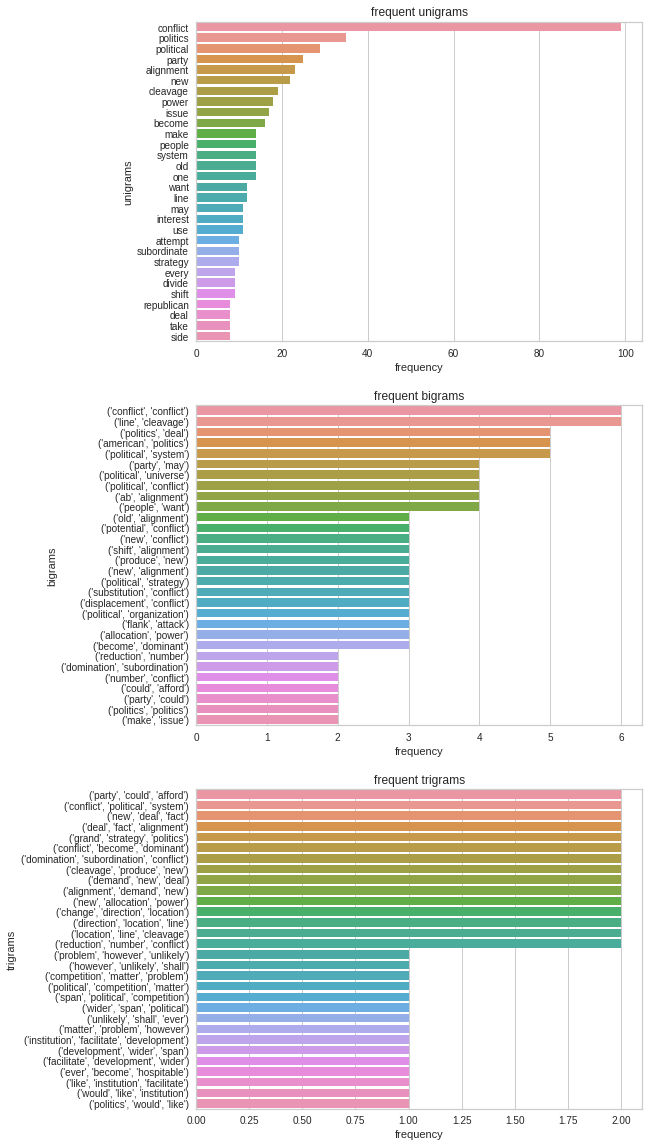

In [45]:
from collections import Counter
from nltk import ngrams
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # 다시 스트링으로 결합
# Text=' '.join(lemmatokens_modified)

#counts the words, bigrams and trigrams
counted = Counter(tokens_stopwords)
counted_2= Counter(ngrams(tokens_stopwords,2))
counted_3= Counter(ngrams(tokens_stopwords,3))

#creates 3 data frames and returns thems
unigrams = pd.DataFrame(counted.items(),columns=['unigrams','frequency']).sort_values(by='frequency',ascending=False)
bigrams =pd.DataFrame(counted_2.items(),columns=['bigrams','frequency']).sort_values(by='frequency',ascending=False)
trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency' ,ascending=False)

# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='unigrams',data=unigrams.head(30)).set(title='frequent unigrams')
sns.barplot(ax=axes[1],x='frequency',y='bigrams',data=bigrams.head(30)).set(title='frequent bigrams')
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams.head(30)).set(title='frequent trigrams')

---
---
< Note > </p>
* 표제어화 및 불용어 제거할 경우 실제 원문의 흐름을 파악하기는 어렵다.
* 따라서, 단순하게 split()로 토큰 리스트를 생성해서 n-gram을 관찰한다면 해당 원문에만 사용된 특수한 표현들을 관찰할 수 있다.
---
--- 
* 이런 단순 방식으로 n-gram을 실행하면 다음과 같다.

[Text(0.5, 1.0, 'frequent fourgrams')]

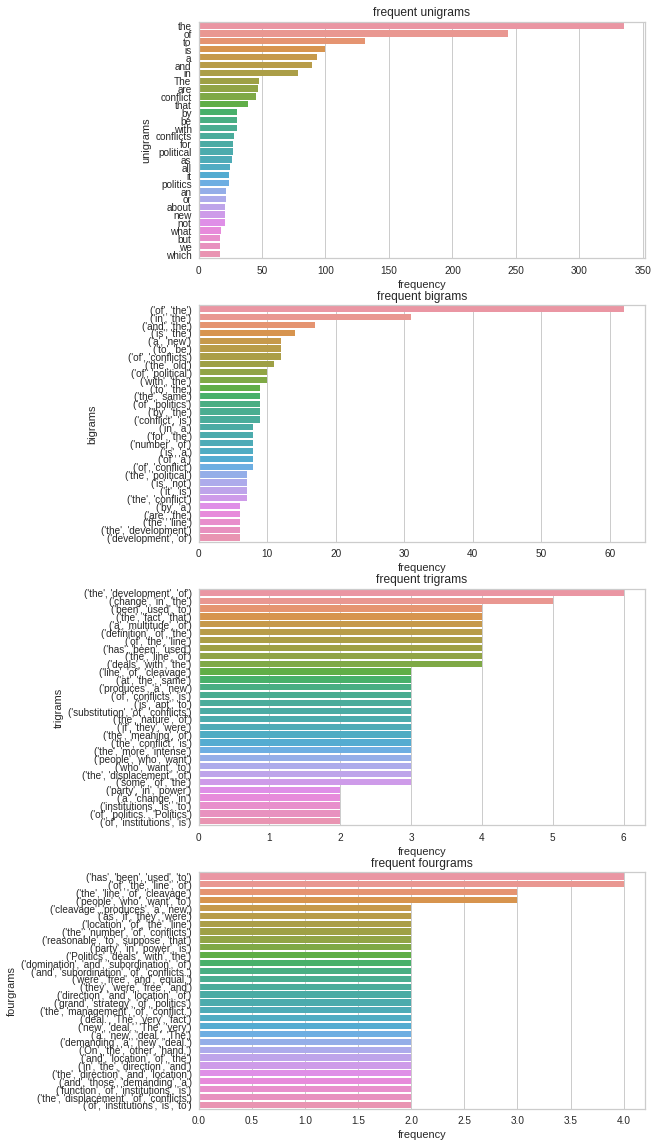

In [51]:
# 단순 토크나이징된 tokens를 사용하면 된다.

from collections import Counter
from nltk import ngrams
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#counts the words, bigrams and trigrams
counted = Counter(tokens)
counted_2= Counter(ngrams(tokens,2))
counted_3= Counter(ngrams(tokens,3))
counted_4= Counter(ngrams(tokens,4))

#creates 3 data frames and returns thems
unigrams = pd.DataFrame(counted.items(),columns=['unigrams','frequency']).sort_values(by='frequency',ascending=False)
bigrams =pd.DataFrame(counted_2.items(),columns=['bigrams','frequency']).sort_values(by='frequency',ascending=False)
trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency' ,ascending=False)
fourgrams =pd.DataFrame(counted_4.items(),columns=['fourgrams','frequency']).sort_values(by='frequency' ,ascending=False)

# create subplot of the different data frames
fig, axes = plt.subplots(4,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='unigrams',data=unigrams.head(30)).set(title='frequent unigrams')
sns.barplot(ax=axes[1],x='frequency',y='bigrams',data=bigrams.head(30)).set(title='frequent bigrams')
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams.head(30)).set(title='frequent trigrams')
sns.barplot(ax=axes[3],x='frequency',y='fourgrams',data=fourgrams.head(30)).set(title='frequent fourgrams')